# Data Analysis

#### Imports

In [1]:
%matplotlib inline

import pandas as pd
pd.options.display.max_rows = 999
import sqlite3
import statsmodels.formula.api as sm
# import statsmodels.api as s
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import cross_val_score

#### Database Connection

In [2]:
conn = sqlite3.connect("./sample.db")

#### Occupy Dataframe

In [3]:
# df_occupy = pd.read_sql(sql="SELECT * FROM occupy", con=conn)
df_occupy_1 = pd.read_sql(sql="SELECT room, date, time, associated_client_count, authenticated_client_count FROM occupy", con=conn)
df_occupy_2 = pd.read_sql(sql="SELECT room, date, time, module_code, occupancy FROM occupy", con=conn)

#### Only consider rows with the following conditions satisfied:

* **Condition 1**: time between 9:00 and 17:00
* **Condition 2:** This condition is because we want to take the average authenticated client count between these times. We are disregarding the other figures because we are not sure of the DHCP lease duration. For instance, a number of the devices could still be being considered from an individual who has already left the room but the lease is still considered.
    - time >= quarter past the hour
    - time <= quarter past the hour

In [4]:
df_occupy_1["condition1"] = df_occupy_1["time"].apply(lambda x: "true" if 16 >= int(x[0:2]) >= 9 else "false")
df_occupy_1 = df_occupy_1[df_occupy_1["condition1"] == "true"]
df_occupy_1

,room,date,time,associated_client_count,authenticated_client_count,condition1
0,B-002,20151102,09:00,NaN,NaN,true
1,B-002,20151102,10:00,NaN,NaN,true
2,B-002,20151102,11:00,NaN,NaN,true
3,B-002,20151102,12:00,NaN,NaN,true
4,B-002,20151102,13:00,NaN,NaN,true
5,B-002,20151102,14:00,NaN,NaN,true
6,B-002,20151102,15:00,NaN,NaN,true
7,B-002,20151102,16:00,NaN,NaN,true
8,B-002,20151109,09:00,NaN,NaN,true
9,B-002,20151109,10:00,13,13,true


In [5]:
df_occupy_1["condition2"] = df_occupy_1["time"].apply(lambda x: "true" if 45 >= int(x[-2:]) >= 15 else "false")
df_occupy_1 = df_occupy_1[df_occupy_1["condition2"] == "true"]
df_occupy_1

,room,date,time,associated_client_count,authenticated_client_count,condition1,condition2
396,B-002,20151103,09:16,0,0,true,true
397,B-002,20151103,09:21,1,1,true,true
398,B-002,20151103,09:27,2,2,true,true
399,B-002,20151103,09:32,1,1,true,true
400,B-002,20151103,09:37,4,4,true,true
401,B-002,20151103,09:42,4,4,true,true
408,B-002,20151103,10:18,30,30,true,true
409,B-002,20151103,10:23,30,30,true,true
410,B-002,20151103,10:28,31,31,true,true
411,B-002,20151103,10:33,29,29,true,true


In [6]:
del df_occupy_1["condition1"]
del df_occupy_1["condition2"]
df_occupy_1["time"] = df_occupy_1["time"].apply(lambda x: x[0:3] + "00")
df_occupy_1

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,room,date,time,associated_client_count,authenticated_client_count
396,B-002,20151103,09:00,0,0
397,B-002,20151103,09:00,1,1
398,B-002,20151103,09:00,2,2
399,B-002,20151103,09:00,1,1
400,B-002,20151103,09:00,4,4
401,B-002,20151103,09:00,4,4
408,B-002,20151103,10:00,30,30
409,B-002,20151103,10:00,30,30
410,B-002,20151103,10:00,31,31
411,B-002,20151103,10:00,29,29


In [7]:
df_occupy_2 = df_occupy_2.dropna() 
df_occupy_2

,room,date,time,module_code,occupancy
0,B-002,20151102,09:00,COMP30190,0.25
1,B-002,20151102,10:00,COMP40660,0.50
3,B-002,20151102,12:00,COMP30250,0.25
4,B-002,20151102,13:00,COMP41690,0.50
5,B-002,20151102,14:00,COMP30260,0.25
7,B-002,20151102,16:00,COMP40660,0.75
8,B-002,20151109,09:00,COMP30190,0.25
9,B-002,20151109,10:00,COMP40660,0.25
11,B-002,20151109,12:00,COMP30250,0.25
12,B-002,20151109,13:00,COMP41690,0.25


In [8]:
df_occupy_merge = pd.merge(left = df_occupy_1, right = df_occupy_2, how="outer", on=["room", "date", "time"]) 
df_occupy_merge

,room,date,time,associated_client_count,authenticated_client_count,module_code,occupancy
0,B-002,20151103,09:00,0,0,NaN,NaN
1,B-002,20151103,09:00,1,1,NaN,NaN
2,B-002,20151103,09:00,2,2,NaN,NaN
3,B-002,20151103,09:00,1,1,NaN,NaN
4,B-002,20151103,09:00,4,4,NaN,NaN
5,B-002,20151103,09:00,4,4,NaN,NaN
6,B-002,20151103,10:00,30,30,COMP30110,0.50
7,B-002,20151103,10:00,30,30,COMP30110,0.50
8,B-002,20151103,10:00,31,31,COMP30110,0.50
9,B-002,20151103,10:00,29,29,COMP30110,0.50


In [9]:
# df_occupy_merge.head(10)

In [10]:
# df_occupy_merge.tail(10)

In [11]:
df_occupy = df_occupy_merge.groupby(["room", "date", "time", "module_code"], as_index=False).mean()

In [12]:
# df_occupy["authenticated_client_count"] = df_occupy["authenticated_client_count"].round(0)
# df_occupy["associated_client_count"] = df_occupy["associated_client_count"].round(0)
print(df_occupy.shape)
df_occupy

(172, 7)


,room,date,time,module_code,associated_client_count,authenticated_client_count,occupancy
0,B-002,20151102,09:00,COMP30190,NaN,NaN,0.25
1,B-002,20151102,10:00,COMP40660,NaN,NaN,0.50
2,B-002,20151102,12:00,COMP30250,NaN,NaN,0.25
3,B-002,20151102,13:00,COMP41690,NaN,NaN,0.50
4,B-002,20151102,14:00,COMP30260,NaN,NaN,0.25
5,B-002,20151102,16:00,COMP40660,NaN,NaN,0.75
6,B-002,20151103,10:00,COMP30110,29.000000,29.000000,0.50
7,B-002,20151103,11:00,COMP30260,27.200000,27.200000,0.50
8,B-002,20151103,12:00,COMP40370,11.833333,11.833333,0.50
9,B-002,20151103,14:00,COMP30240,48.000000,48.000000,0.75


#### Remove rows with NaN values 

In [13]:
print(df_occupy.shape)
df_occupy = df_occupy.dropna() 
print(df_occupy.shape)
df_occupy

(172, 7)
(153, 7)


,room,date,time,module_code,associated_client_count,authenticated_client_count,occupancy
6,B-002,20151103,10:00,COMP30110,29.000000,29.000000,0.50
7,B-002,20151103,11:00,COMP30260,27.200000,27.200000,0.50
8,B-002,20151103,12:00,COMP40370,11.833333,11.833333,0.50
9,B-002,20151103,14:00,COMP30240,48.000000,48.000000,0.75
10,B-002,20151103,15:00,COMP30240,35.800000,35.400000,0.25
11,B-002,20151103,16:00,COMP40370,38.714286,38.142857,0.25
12,B-002,20151104,09:00,COMP30190,14.000000,14.000000,0.25
13,B-002,20151104,10:00,COMP40660,14.166667,14.166667,0.25
14,B-002,20151104,11:00,COMP30250,8.000000,7.833333,0.25
15,B-002,20151104,12:00,COMP41690,36.166667,36.000000,0.50


#### Module Dataframe

In [14]:
df_module = pd.read_sql(sql="SELECT * FROM module", con=conn)
df_module.head(10)

,module_code,reg_students
0,COMP10110,113
1,COMP10130,112
2,COMP10280,56
3,COMP20010,108
4,COMP20020,98
5,COMP20020_P1,53
6,COMP20020_P2,45
7,COMP20070,107
8,COMP20110,103
9,COMP20130,74


In [15]:
df_module.tail(10)

,module_code,reg_students
30,COMP41450 & COMP30120,143
31,COMP41690,60
32,COMP47290,0
33,COMP47300,0
34,ENVB30110,83
35,IS40640,49
36,MATH10130,56
37,MATH10200,96
38,SCI30060,66
39,STAT40150,0


#### Location Dataframe

In [16]:
df_location = pd.read_sql(sql="SELECT * FROM location", con=conn)
df_location.head(10)

,campus,building,room,capacity
0,Belfield,Computer Science,B-002,90
1,Belfield,Computer Science,B-003,90
2,Belfield,Computer Science,B-004,160


In [17]:
df_location.tail(10)

,campus,building,room,capacity
0,Belfield,Computer Science,B-002,90
1,Belfield,Computer Science,B-003,90
2,Belfield,Computer Science,B-004,160


#### Close db connection

In [18]:
conn.close()

## Construct Analytics Base Table

#### Join tables

In [19]:
df_abt = pd.merge(left = df_occupy, right = df_module, how="outer", on=["module_code"]) 
df_abt = pd.merge(left = df_abt, right = df_location, how="outer", on=["room"]) 
print(df_abt.shape)
df_abt

(154, 11)


,room,date,time,module_code,associated_client_count,authenticated_client_count,occupancy,reg_students,campus,building,capacity
0,B-002,20151103,10:00,COMP30110,29.000000,29.000000,0.50,45,Belfield,Computer Science,90
1,B-002,20151105,10:00,COMP30110,33.166667,33.166667,0.50,45,Belfield,Computer Science,90
2,B-002,20151110,10:00,COMP30110,24.666667,24.666667,0.00,45,Belfield,Computer Science,90
3,B-002,20151112,10:00,COMP30110,27.166667,27.166667,0.25,45,Belfield,Computer Science,90
4,B-002,20151103,11:00,COMP30260,27.200000,27.200000,0.50,18,Belfield,Computer Science,90
5,B-002,20151105,12:00,COMP30260,20.833333,20.833333,0.25,18,Belfield,Computer Science,90
6,B-002,20151109,14:00,COMP30260,11.333333,11.333333,0.25,18,Belfield,Computer Science,90
7,B-002,20151110,11:00,COMP30260,19.333333,19.333333,0.25,18,Belfield,Computer Science,90
8,B-002,20151112,12:00,COMP30260,13.833333,13.833333,0.25,18,Belfield,Computer Science,90
9,B-002,20151103,12:00,COMP40370,11.833333,11.833333,0.50,27,Belfield,Computer Science,90


In [20]:
df_abt["occupancy_number"] = df_abt["occupancy"] * df_abt["capacity"]

#### Test: Does ground truth data have more students than what is registered

In [21]:
df_abt["reg_students_less_occ"] = df_abt["reg_students"] - df_abt["occupancy_number"]

In [22]:
errors = df_abt[df_abt["reg_students_less_occ"] < 0]
print(errors.shape)
errors[["reg_students_less_occ", "occupancy_number", "reg_students"]]

(37, 13)


,reg_students_less_occ,occupancy_number,reg_students
4,-27.0,45.0,18
5,-4.5,22.5,18
6,-4.5,22.5,18
7,-4.5,22.5,18
8,-4.5,22.5,18
9,-18.0,45.0,27
15,-25.5,67.5,42
19,-3.0,45.0,42
20,-3.0,45.0,42
21,-3.0,45.0,42


* For those rows with -10, change occupancy_number to the number of registered students
* Should we disregard rows with greater difference because data should be considered to be an outlier
* Also, what to do with the rows that have 0 registered students i.e. was there a class? If not should we even consider it?......

#### Get % error 

In [23]:
df_abt["error_perc"] = (df_abt["reg_students"] - df_abt["occupancy_number"]) / df_abt["capacity"]
df_abt

,room,date,time,module_code,associated_client_count,authenticated_client_count,occupancy,reg_students,campus,building,capacity,occupancy_number,reg_students_less_occ,error_perc
0,B-002,20151103,10:00,COMP30110,29.000000,29.000000,0.50,45,Belfield,Computer Science,90,45.0,0.0,0.000000
1,B-002,20151105,10:00,COMP30110,33.166667,33.166667,0.50,45,Belfield,Computer Science,90,45.0,0.0,0.000000
2,B-002,20151110,10:00,COMP30110,24.666667,24.666667,0.00,45,Belfield,Computer Science,90,0.0,45.0,0.500000
3,B-002,20151112,10:00,COMP30110,27.166667,27.166667,0.25,45,Belfield,Computer Science,90,22.5,22.5,0.250000
4,B-002,20151103,11:00,COMP30260,27.200000,27.200000,0.50,18,Belfield,Computer Science,90,45.0,-27.0,-0.300000
5,B-002,20151105,12:00,COMP30260,20.833333,20.833333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
6,B-002,20151109,14:00,COMP30260,11.333333,11.333333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
7,B-002,20151110,11:00,COMP30260,19.333333,19.333333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
8,B-002,20151112,12:00,COMP30260,13.833333,13.833333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
9,B-002,20151103,12:00,COMP40370,11.833333,11.833333,0.50,27,Belfield,Computer Science,90,45.0,-18.0,-0.200000


#### Remove those with an error larger than 10%

In [24]:
df_abt = df_abt[df_abt["error_perc"] >= -0.1]
print(df_abt.shape)
df_abt

(130, 14)


,room,date,time,module_code,associated_client_count,authenticated_client_count,occupancy,reg_students,campus,building,capacity,occupancy_number,reg_students_less_occ,error_perc
0,B-002,20151103,10:00,COMP30110,29.000000,29.000000,0.50,45,Belfield,Computer Science,90,45.0,0.0,0.000000
1,B-002,20151105,10:00,COMP30110,33.166667,33.166667,0.50,45,Belfield,Computer Science,90,45.0,0.0,0.000000
2,B-002,20151110,10:00,COMP30110,24.666667,24.666667,0.00,45,Belfield,Computer Science,90,0.0,45.0,0.500000
3,B-002,20151112,10:00,COMP30110,27.166667,27.166667,0.25,45,Belfield,Computer Science,90,22.5,22.5,0.250000
5,B-002,20151105,12:00,COMP30260,20.833333,20.833333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
6,B-002,20151109,14:00,COMP30260,11.333333,11.333333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
7,B-002,20151110,11:00,COMP30260,19.333333,19.333333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
8,B-002,20151112,12:00,COMP30260,13.833333,13.833333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000
10,B-002,20151103,16:00,COMP40370,38.714286,38.142857,0.25,27,Belfield,Computer Science,90,22.5,4.5,0.050000
11,B-002,20151105,11:00,COMP40370,30.250000,30.000000,0.25,27,Belfield,Computer Science,90,22.5,4.5,0.050000


#### Those with an error equal to or less than a 10% error, adjust figure to equal ground truth

In [25]:
df_abt["adjustment"] = df_abt["reg_students_less_occ"].apply(lambda x: x if x <= 0 else 0)
df_abt

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,room,date,time,module_code,associated_client_count,authenticated_client_count,occupancy,reg_students,campus,building,capacity,occupancy_number,reg_students_less_occ,error_perc,adjustment
0,B-002,20151103,10:00,COMP30110,29.000000,29.000000,0.50,45,Belfield,Computer Science,90,45.0,0.0,0.000000,0.0
1,B-002,20151105,10:00,COMP30110,33.166667,33.166667,0.50,45,Belfield,Computer Science,90,45.0,0.0,0.000000,0.0
2,B-002,20151110,10:00,COMP30110,24.666667,24.666667,0.00,45,Belfield,Computer Science,90,0.0,45.0,0.500000,0.0
3,B-002,20151112,10:00,COMP30110,27.166667,27.166667,0.25,45,Belfield,Computer Science,90,22.5,22.5,0.250000,0.0
5,B-002,20151105,12:00,COMP30260,20.833333,20.833333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000,-4.5
6,B-002,20151109,14:00,COMP30260,11.333333,11.333333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000,-4.5
7,B-002,20151110,11:00,COMP30260,19.333333,19.333333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000,-4.5
8,B-002,20151112,12:00,COMP30260,13.833333,13.833333,0.25,18,Belfield,Computer Science,90,22.5,-4.5,-0.050000,-4.5
10,B-002,20151103,16:00,COMP40370,38.714286,38.142857,0.25,27,Belfield,Computer Science,90,22.5,4.5,0.050000,0.0
11,B-002,20151105,11:00,COMP40370,30.250000,30.000000,0.25,27,Belfield,Computer Science,90,22.5,4.5,0.050000,0.0


In [26]:
df_abt["occupancy_number_adj"] = df_abt["adjustment"] + df_abt["occupancy_number"]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Analysis of data with occupancy number equal to zero (NEED TO DO SOMETHING WITH THIS!!!!)

In [27]:
a = df_abt[df_abt["occupancy_number_adj"] == 0]
a[["module_code", "reg_students", "occupancy_number_adj", "authenticated_client_count"]]

,module_code,reg_students,occupancy_number_adj,authenticated_client_count
2,COMP30110,45,0,24.666667
28,COMP30190,29,0,11.000000
29,COMP30190,29,0,16.000000
33,COMP40660,53,0,10.714286
40,COMP41690,60,0,22.333333
45,COMP30220,38,0,2.666667
46,COMP30220,38,0,17.166667
47,COMP30220,38,0,6.500000
48,COMP30520 & COMP41110,79,0,5.166667
51,COMP47290,0,0,6.166667


#### Create binned associated and authenticated client counts for logistic regression

In [28]:
# def bin(r):
#     '''Bin client counts into percintle categories'''
#     if r < .125:
#         return .0
#     elif r < .375: 
#         return .25
#     elif r < .625:
#         return .5
#     elif r < .875:
#         return .75
#     else:
#         return 1.0 

# df_abt["assoc_binned"] = df_abt["associated_client_count"] / df_abt["capacity"]
# df_abt["assoc_binned"] = df_abt["assoc_binned"].apply(lambda x: bin(x))
# df_abt["auth_binned"] = df_abt["authenticated_client_count"] / df_abt["capacity"]
# df_abt["auth_binned"] = df_abt["auth_binned"].apply(lambda x: bin(x))
# df_abt

#### Regression dataframe

In [29]:
df_regression = df_abt[["occupancy_number_adj", "authenticated_client_count"]]
df_regression

,occupancy_number_adj,authenticated_client_count
0,45.0,29.000000
1,45.0,33.166667
2,0.0,24.666667
3,22.5,27.166667
5,18.0,20.833333
6,18.0,11.333333
7,18.0,19.333333
8,18.0,13.833333
10,22.5,38.142857
11,22.5,30.000000


#### Normalize Features and remove outliers (?)

In [30]:
# def normalize(df, feature):
#     return (df[feature] - df[feature].mean()) / df[feature].std()

# for feature in normFeat:
#     df_new[feature] = normalize(df_new, feature)

# def removeOutliers(df, feature):
#     '''Remove outliers (more than 3 std devs from mean)'''
#     return df[np.abs(df[feature] - df[feature].mean()) <= (3 * df[feature].std())]

# for feature in normFeat:
#     df_new = removeOutliers(df_new, feature)

### Feature Analysis

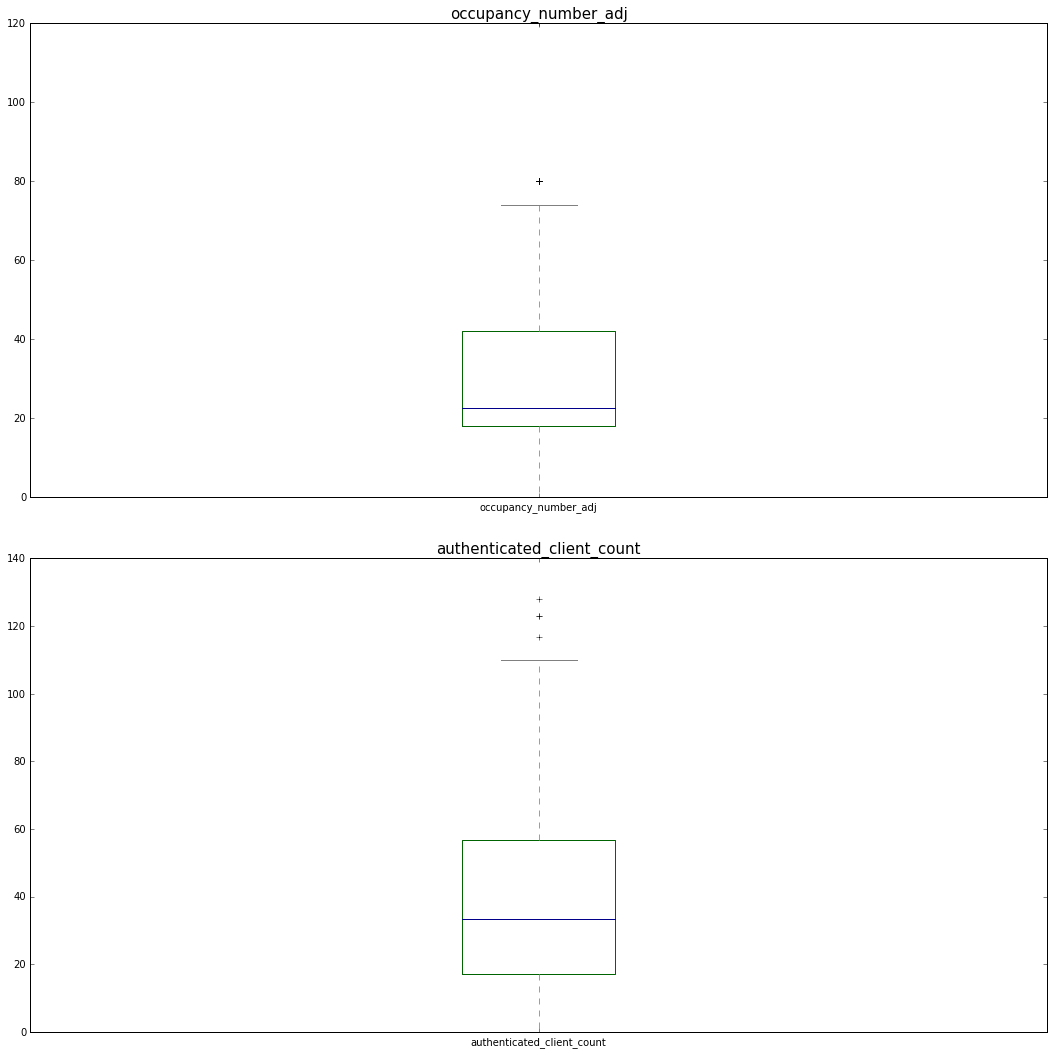

In [31]:
colour = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray') #colours for box plots

plt.figure() 

plt.subplot(211).set_title("occupancy_number_adj", fontsize=15)
df_regression["occupancy_number_adj"].plot(kind = 'box', figsize = (15,15), color=colour, sym='r+') 

plt.subplot(212).set_title("authenticated_client_count", fontsize=15)
df_regression["authenticated_client_count"].plot(kind = 'box', figsize = (15,15), color=colour, sym='r+') 

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=3.0) #set padding
# plt.savefig("Box_Plots.png")

In [32]:
print(df_regression.dtypes)

corrMatrix = df_regression.corr()
corrMatrix

occupancy_number_adj          float64
authenticated_client_count    float64
dtype: object


,occupancy_number_adj,authenticated_client_count
occupancy_number_adj,1.000000,0.747904
authenticated_client_count,0.747904,1.000000


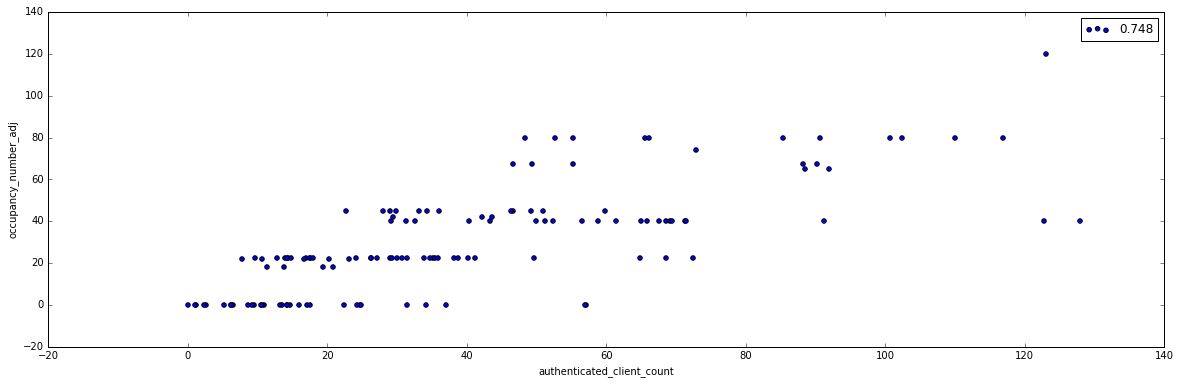

In [33]:
plt.figure() 
df_regression.plot(kind="scatter", x="authenticated_client_count", y="occupancy_number_adj", label="%.3f" % corrMatrix.as_matrix()[0,1], figsize=(20, 6))
# plt.savefig("Scatter_Plot.png")

### Regression

#### Statsmodels

In [34]:
lm_sm = sm.ols(formula="occupancy_number_adj ~ authenticated_client_count - 1", data=df_regression).fit()
print(lm_sm.summary())

                             OLS Regression Results                             
Dep. Variable:     occupancy_number_adj   R-squared:                       0.817
Model:                              OLS   Adj. R-squared:                  0.815
Method:                   Least Squares   F-statistic:                     575.2
Date:                  Fri, 29 Jul 2016   Prob (F-statistic):           2.21e-49
Time:                          12:47:10   Log-Likelihood:                -553.13
No. Observations:                   130   AIC:                             1108.
Df Residuals:                       129   BIC:                             1111.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------


#### Scikit Learn

Coefficients: 
 [ 0.72426532]
Intercept: 
 0.0
Residual sum of squares: 290.57
290.569596111
17.0461020797
Variance score: 0.55


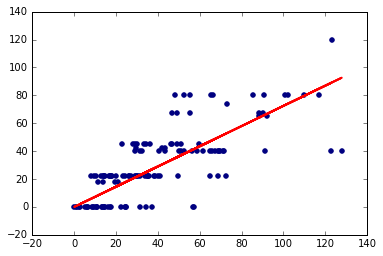

In [41]:
X = df_regression["authenticated_client_count"].reshape(len(df_regression["authenticated_client_count"]), 1)
y = df_regression["occupancy_number_adj"]

lm_scikit = LinearRegression(fit_intercept=False)

# Fit the model 
lm_scikit.fit(X, y)

# Coefficients
print("Coefficients: \n", lm_scikit.coef_)
# The intercept
print('Intercept: \n', lm_scikit.intercept_)
# The mean square error: MSE is more popular than MAE because MSE "punishes" larger errors. 
# But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.
print("Residual sum of squares: %.2f" % np.mean((lm_scikit.predict(X) - y) ** 2))
print(metrics.mean_squared_error(y, lm_scikit.predict(X)))
print(np.sqrt(metrics.mean_squared_error(y, lm_scikit.predict(X))))

# Explained variance score: coefficient of determination (R^2)
print("Variance score: %.2f" % lm_scikit.score(X, y))

# Plot outputs
plt.scatter(X, y,  color='navy')
plt.plot(X, lm_scikit.predict(X), color='red',linewidth=2)
plt.figure(figsize=(20,20))
plt.show()

In [36]:
print(lm_scikit.predict(X))

[ 21.00369417  24.02146632  17.86521114  19.67587443  15.08886076
   8.20834025  14.00246278  10.01900354  27.62554849  21.72795949
  22.81435746  25.46999696  21.00369417  25.6389922   21.24511594
  24.52155428  31.57796779  30.53985417  21.31409359  12.67464304
  10.13971443  12.31251038  10.3811362   10.74326886   9.29473823
   7.96691848  11.58824506  10.26042531  12.67464304  52.50923543
   7.75998553   5.67341164  14.63015939  12.0710886    7.72549671
  16.77881316  26.07355139  16.17525873  25.9528405   29.81558885
  13.03677569  17.50307848   1.93137418  12.43322126   4.70772456
   3.74203747  22.21080303   4.46630278  36.93753113  22.76262423
  46.95653467  35.97184404   6.95294704   9.77758177   7.60478582
  44.42160607  47.68079999  37.05824202  79.66918479  51.60390379
  66.02885467  49.61217417  89.0846339   48.88790885  65.61843766
  74.11648403  88.96392302  47.51180475  36.21326581  50.09501771
  37.90321822  39.95530328  35.05444131  40.92099037  17.98592202
  42.58680

In [37]:
df_regression["predicted_occupancy"] = pd.Series(lm_scikit.predict(X), index=df_regression.index)
df_regression

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,occupancy_number_adj,authenticated_client_count,predicted_occupancy
0,45.0,29.000000,21.003694
1,45.0,33.166667,24.021466
2,0.0,24.666667,17.865211
3,22.5,27.166667,19.675874
5,18.0,20.833333,15.088861
6,18.0,11.333333,8.208340
7,18.0,19.333333,14.002463
8,18.0,13.833333,10.019004
10,22.5,38.142857,27.625548
11,22.5,30.000000,21.727959


### Train & Testing

(91, 1)
(91,)
(39, 1)
(39,)
Coefficients: 
 [ 0.78382339]
Intercept: 
 0.0
Residual sum of squares: 459.61
459.609393947
21.4385026051
Variance score: 0.30


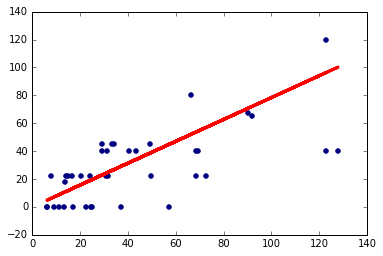

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Train the model using the training sets
lm_scikit.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', lm_scikit.coef_)
# The intercept
print('Intercept: \n', lm_scikit.intercept_)
# The mean square error
print("Residual sum of squares: %.2f" % np.mean((lm_scikit.predict(X_test) - y_test) ** 2))
print(metrics.mean_squared_error(y_test, lm_scikit.predict(X_test)))
print(np.sqrt(metrics.mean_squared_error(y_test, lm_scikit.predict(X_test))))
# Explained variance score: coefficient of determination (R^2)
print('Variance score: %.2f' % lm_scikit.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='navy')
plt.plot(X_test, lm_scikit.predict(X_test), color='red',linewidth=3)
plt.figure(figsize=(20,20))
plt.show()

In [39]:
# plt.scatter(lm_scikit.predict(X_train), lm_scikit.predict(X_train) - y_train, color="navy", s=40, alpha=0.5)
# plt.scatter(lm_scikit.predict(X_test), lm_scikit.predict(X_test) - y_test, color="green", s=40)
# plt.hlines(y=0, xmin=0, xmax=160)
# plt.title("Residual Plot: training (Navy) and test (Green) data")
# plt.ylabel("Residuals")